In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
# https://www.kaggle.com/alxmamaev/flowers-recognition
dir = '/content/gdrive/MyDrive/Colab Notebooks/flowers'

In [7]:
DEBUG = False

In [28]:
import os
import matplotlib.image as mpimg
import pandas as pd
import numpy as np
from skimage.transform import rescale, resize, downscale_local_mean
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Flatten
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix


FLOWER_TYPES = ['sunflower', 'dandelion', 'tulip', 'daisy', 'rose']


def listdir_fullpath(path):
  return (os.path.join(path, f) for f in os.listdir(path))


def filter_out_py_files(i):
  return (f for f in i if not f.endswith('.py') and not f.endswith('.pyc'))


def create_df(flower_type, label):
  path = os.path.join(dir, flower_type)
  arr = []
  for i, img_path in enumerate(filter_out_py_files(listdir_fullpath(path))):
    if DEBUG:
      print(i)
      print(img_path)
    arr.append(
      resize(
        mpimg.imread(img_path), (48, 48, 3), anti_aliasing=True
      ).reshape(6912)
    )
  arr = pd.DataFrame(arr)
  xx = pd.DataFrame({'label': np.ones(len(arr)) * label})
  arr = pd.concat([xx, arr], axis=1)
  return arr

In [9]:
for i, class_name in enumerate(FLOWER_TYPES):
  globals()[class_name] = create_df(class_name, i)

In [10]:
sunflower.head(5)

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,0.0,0.732605,0.686574,0.666013,0.773448,0.729248,0.702471,0.745343,0.680154,0.618307,0.737704,0.671358,0.602322,0.761234,0.701123,0.649081,0.747917,0.692565,0.653350,0.764427,0.709974,0.674026,0.771262,0.722692,0.698100,0.760784,0.706087,0.681978,0.799387,0.759967,0.752294,0.814849,0.778043,0.771324,0.772420,0.710049,0.678098,0.803962,0.756699,0.740230,...,0.182190,0.323734,0.309600,0.156209,0.297794,0.275443,0.145752,0.314624,0.321569,0.149469,0.334436,0.283939,0.153316,0.381250,0.298243,0.167320,0.418096,0.402185,0.194118,0.377124,0.381699,0.164706,0.428888,0.448570,0.208701,0.457537,0.396528,0.245547,0.406944,0.306012,0.184892,0.442239,0.373482,0.211765,0.364931,0.382353,0.156863,0.390686,0.352737,0.170255
1,0.0,0.290196,0.427451,0.125490,0.285861,0.423529,0.125000,0.262745,0.401517,0.099837,0.243137,0.384314,0.086275,0.233441,0.368627,0.082353,0.223529,0.357552,0.074510,0.215686,0.349020,0.082353,0.220221,0.349632,0.086275,0.227614,0.352967,0.094118,0.272386,0.397876,0.127900,0.309390,0.431373,0.208088,0.322181,0.439216,0.260580,0.329412,0.432950,0.282787,...,0.303186,0.321160,0.425286,0.398039,0.379330,0.477369,0.529044,0.453186,0.547304,0.678431,0.512541,0.607271,0.781046,0.537868,0.632573,0.825230,0.550245,0.643750,0.845588,0.562010,0.654825,0.864379,0.566416,0.656127,0.868301,0.543873,0.643980,0.826838,0.514175,0.620057,0.757573,0.447666,0.561392,0.625980,0.423116,0.537377,0.583824,0.456658,0.562975,0.649428
2,0.0,0.772061,0.932190,0.984314,0.780882,0.935580,0.988235,0.802124,0.942393,0.984314,0.821761,0.948950,0.984314,0.877180,0.961627,0.988235,0.943178,0.978717,0.988235,0.961356,0.982639,0.988235,0.957435,0.980392,0.990482,0.973121,0.984407,0.990482,0.957884,0.982639,0.989452,0.910866,0.968908,0.988235,0.909189,0.970874,0.988235,0.932230,0.976471,0.988235,...,0.208088,0.348325,0.448652,0.117647,0.287255,0.448080,0.121121,0.583905,0.654902,0.158742,0.376642,0.520261,0.203530,0.519334,0.567455,0.068668,0.376333,0.476128,0.119812,0.304493,0.486315,0.168627,0.218364,0.392239,0.107208,0.167019,0.316039,0.117647,0.215768,0.366626,0.160703,0.245833,0.380515,0.178391,0.424229,0.431168,0.067729,0.337704,0.431820,0.073407
3,0.0,0.525490,0.827451,0.984314,0.535294,0.827451,0.984314,0.537908,0.835294,0.988235,0.545098,0.838562,0.988235,0.545098,0.839216,0.992157,0.545098,0.835294,0.991503,0.545098,0.835294,0.988235,0.541176,0.835294,0.988235,0.541176,0.839216,0.988235,0.541176,0.835294,0.988235,0.541176,0.835294,0.988235,0.541176,0.835294,0.988235,0.537255,0.835294,0.988235,...,0.247059,0.215686,0.371242,0.092810,0.114379,0.248366,0.066667,0.115686,0.235294,0.070588,0.105229,0.243137,0.071242,0.109150,0.258170,0.085621,0.129412,0.260784,0.103922,0.101307,0.226797,0.098039,0.101961,0.242484,0.109150,0.109804,0.264706,0.127451,0.114379,0.282353,0.137255,0.129412,0.285621,0.133333,0.268627,0.445098,0.366667,0.646405,0.834641,0.886928
4,0.0,0.336268,0.562255,0.761772,0.300306,0.545261,0.799673,0.306175,0.544608,0.804282,0.306209,0.541340,0.804282,0.298325,0.541319,0.803595,0.298359,0.541993,0.807516,0.306168,0.545261,0.803636,0.306189,0.541340,0.799714,0.298325,0.545261,0.799673,0.294404,0.549183,0.799673,0.300306,0.543301,0.797733,0.302288,0.541340,0.795752,0.294410,0.541340,0.799714,...,0.437030,0.436275,0.440809,0.331693,0.524469,0.532959,0.476797,0.455351,0.443587,0.333313,0.494526,0.474918,0.341789,0.444356,0.469077,0.390775,0.451368,0.527717,0.528983,0.408258,0.447474,0.428595,0.483463,0.557190,0.548618,0.465237,0.504330,0.429248,0.441667,0.525865,0.500408,0.505065,0.663780,0.712643,0.547426,0.678636,0.756168,0.550041,0.676627,0.711765


In [11]:
len(daisy), len(sunflower), len(rose), len(dandelion), len(tulip)

(769, 734, 784, 1052, 984)

In [12]:
tr1 = sunflower.drop('label',1)
ts1 = sunflower['label']
X_train, X_test, y_train, y_test = train_test_split(
    tr1, ts1, test_size=0.2, random_state=0
)
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)
# no do-while loops in python
for class_name in FLOWER_TYPES[1:]:
  d = globals()[class_name]
  tr1 = d.drop('label',1)
  ts1 = d['label']
  x, xx, y, yy = train_test_split(
      tr1, ts1, test_size=0.2, random_state=0
  )
  X_train = pd.concat([X_train, x], axis=0)
  X_test = pd.concat([X_test, xx], axis=0)
  y = pd.DataFrame(y)
  yy = pd.DataFrame(yy)
  y_train = pd.concat([y_train, y], axis=0)
  y_test = pd.concat([y_test, yy], axis=0)

In [13]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3457 entries, 97 to 684
Columns: 6912 entries, 0 to 6911
dtypes: float64(6912)
memory usage: 182.3 MB


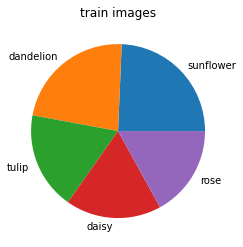

In [14]:
plt.title('train images')
plt.pie(y_train['label'].value_counts().values, labels=FLOWER_TYPES)
plt.show()

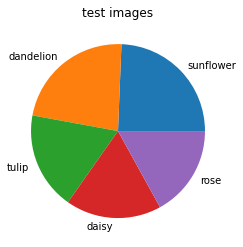

In [15]:
plt.title('test images')
plt.pie(y_test['label'].value_counts().values, labels=FLOWER_TYPES)
plt.show()

In [16]:
train = pd.concat([y_train, X_train], axis=1).sample(frac=1)
test = pd.concat([y_test, X_test], axis=1).sample(frac=1)

In [17]:
train.head()

,label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,...,6872,6873,6874,6875,6876,6877,6878,6879,6880,6881,6882,6883,6884,6885,6886,6887,6888,6889,6890,6891,6892,6893,6894,6895,6896,6897,6898,6899,6900,6901,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
661,4.0,0.839216,0.815686,0.752941,0.850980,0.827451,0.764706,0.862745,0.837418,0.776471,0.874510,0.847059,0.788235,0.886275,0.862745,0.800000,0.890196,0.866667,0.803922,0.898039,0.874510,0.811765,0.901961,0.882353,0.819526,0.901961,0.882350,0.815686,0.888399,0.862708,0.794281,0.855392,0.812745,0.745517,0.798856,0.729844,0.652614,0.776471,0.688994,0.607843,...,0.693209,0.892542,0.876855,0.782761,0.929412,0.916503,0.845915,0.921068,0.909232,0.834794,0.768747,0.771034,0.676791,0.579167,0.622471,0.508742,0.696569,0.711029,0.612857,0.849149,0.829558,0.743284,0.910686,0.890213,0.816503,0.921569,0.900490,0.835294,0.925490,0.901961,0.839216,0.925490,0.901961,0.839216,0.925490,0.901961,0.839216,0.925490,0.901961,0.839216
430,0.0,0.117683,0.079662,0.055025,0.099127,0.067264,0.039338,0.263725,0.137582,0.025327,0.322467,0.145547,0.007843,0.134559,0.053508,0.007843,0.101266,0.038424,0.007843,0.459926,0.235172,0.011765,0.834360,0.489338,0.019485,0.905474,0.572304,0.019485,0.611520,0.400710,0.042810,0.433701,0.377819,0.141054,0.271645,0.262781,0.065314,0.340033,0.305882,0.123483,...,0.050996,0.070588,0.047059,0.043137,0.086275,0.058824,0.050980,0.098039,0.062745,0.058824,0.082353,0.052778,0.048800,0.062745,0.027451,0.019771,0.058824,0.023529,0.017233,0.058824,0.027451,0.019608,0.058824,0.023529,0.015686,0.054902,0.023529,0.015686,0.054902,0.023407,0.015686,0.054902,0.019608,0.011765,0.054902,0.019608,0.011780,0.050980,0.015686,0.011765
734,4.0,0.368995,0.384681,0.243505,0.371446,0.371446,0.285417,0.256127,0.253676,0.228309,0.350000,0.334314,0.226593,0.330515,0.342034,0.152206,0.421936,0.389093,0.334436,0.408701,0.390931,0.281127,0.367647,0.372794,0.201471,0.353554,0.361029,0.199632,0.348529,0.389461,0.196691,0.267279,0.360172,0.156250,0.300980,0.339338,0.171936,0.272794,0.227328,0.083824,...,0.463725,0.967402,0.875123,0.587990,0.979167,0.920956,0.719485,0.931495,0.881127,0.755637,0.686887,0.685417,0.603922,0.319975,0.321569,0.275980,0.260539,0.201471,0.166789,0.240196,0.213971,0.095343,0.590441,0.482721,0.133946,0.740196,0.634804,0.398407,0.535172,0.556250,0.471078,0.246078,0.256005,0.206250,0.242525,0.308578,0.191544,0.301961,0.407843,0.356863
508,0.0,0.246528,0.292763,0.135131,0.406638,0.487970,0.210151,0.393444,0.418852,0.132312,0.249966,0.233170,0.095227,0.200511,0.164195,0.088235,0.264495,0.217804,0.125197,0.177097,0.131059,0.071242,0.193178,0.174592,0.100000,0.146855,0.097944,0.048645,0.126144,0.058824,0.027451,0.159416,0.144322,0.095813,0.213065,0.233776,0.158898,0.161520,0.136846,0.082230,...,0.359906,0.527369,0.524721,0.398414,0.594703,0.556842,0.410560,0.663501,0.646528,0.477819,0.632687,0.631454,0.459225,0.547168,0.568981,0.395731,0.536091,0.578207,0.414093,0.540931,0.678840,0.522828,0.315074,0.378847,0.264862,0.132741,0.086540,0.041013,0.181529,0.133081,0.065278,0.202247,0.207591,0.079827,0.145527,0.112623,0.040155,0.111029,0.048938,0.021487
1037,1.0,0.247222,0.247222,0.247222,0.295261,0.295261,0.295261,0.347549,0.347549,0.347549,0.416006,0.416006,0.416006,0.464277,0.464277,0.464277,0.543335,0.543335,0.543335,0.585131,0.585131,0.585131,0.645752,0.645752,0.645752,0.658817,0.658817,0.658817,0.638725,0.638725,0.638725,0.693117,0.693117,0.693117,0.735948,0.735948,0.735948,0.664658,0.664658,0.664658,...,0.662745,0.602778,0.602778,0.602778,0.597011,0.597011,0.597011,0.596895,0.596895,0.596895,0.674673,0.674673,0.674673,0.675000,0.675000,0.675000,0.616667,0.616667,0.616667,0.556897,0.556897,0.556897,0.556080,0.556080,0.556080,0.482843,0.482843,0.482843,0.360621,0.360621,0.360621,0.311928,0.311928,0.311928,0.293954,0.293954,0.293954,0.282190,0.282190,0.282190


In [18]:
X_train = train.drop('label', 1).to_numpy()
y_train = train['label'].to_numpy().astype('int64')
X_test = test.drop('label', 1).to_numpy()
y_test = test['label'].to_numpy().astype('int64')

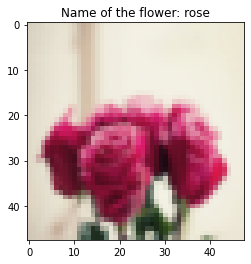

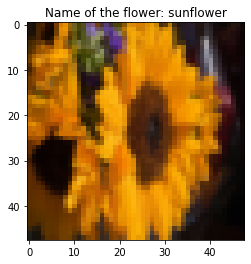

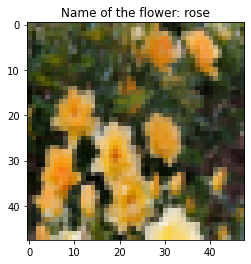

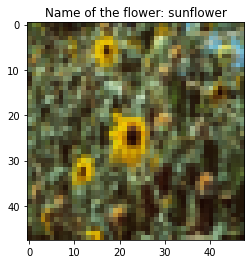

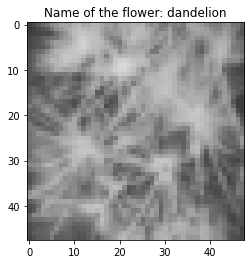

In [19]:
for i in range(5):
  plt.title(f'Name of the flower: {FLOWER_TYPES[y_train[i]]}')
  plt.imshow(X_train[i].reshape(48,48,3))
  plt.show()

In [20]:
X_train.shape, X_test.shape

((3457, 6912), (866, 6912))

In [21]:
X_train = X_train.reshape(3457, 48, 48, 3)
X_test = X_test.reshape(866, 48, 48, 3)
y_train = y_train.reshape(3457, 1)
y_test = y_test.reshape(866, 1)

In [22]:
model = Sequential()
model.add(Conv2D(64, activation='relu', kernel_size=(3, 3), input_shape=X_train[0].shape))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        1792      
_________________________________________________________________
dense (Dense)                (None, 46, 46, 64)        4160      
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 46, 46, 64)        4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 46, 46, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 135424)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

In [23]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
hist = model.fit(X_train, y_train, batch_size=10, epochs=7, verbose=1, validation_data=(X_test, y_test))

Epoch 1/7
346/346 [==============================] - 11s 11ms/step - loss: 1.6109 - accuracy: 0.3628 - val_loss: 1.1277 - val_accuracy: 0.5231
Epoch 2/7
346/346 [==============================] - 3s 10ms/step - loss: 1.1105 - accuracy: 0.5528 - val_loss: 1.0669 - val_accuracy: 0.5670
Epoch 3/7
346/346 [==============================] - 3s 10ms/step - loss: 0.9681 - accuracy: 0.6178 - val_loss: 0.9967 - val_accuracy: 0.6143
Epoch 4/7
346/346 [==============================] - 3s 10ms/step - loss: 0.7483 - accuracy: 0.7082 - val_loss: 1.0092 - val_accuracy: 0.5935
Epoch 5/7
346/346 [==============================] - 3s 10ms/step - loss: 0.5488 - accuracy: 0.8023 - val_loss: 1.1650 - val_accuracy: 0.5889
Epoch 6/7
346/346 [==============================] - 3s 10ms/step - loss: 0.3369 - accuracy: 0.8797 - val_loss: 1.1940 - val_accuracy: 0.6016
Epoch 7/7
346/346 [==============================] - 3s 10ms/step - loss: 0.2390 - accuracy: 0.9164 - val_loss: 1.6120 - val_accuracy: 0.5831


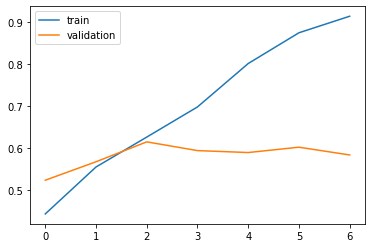

In [24]:
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

In [25]:
y_pred = model.predict(X_test)

In [27]:
y_final = [np.argmax(y_pred[i]) for i, _ in enumerate(y_pred)]
y_final[:20]

[1, 3, 4, 1, 0, 0, 4, 1, 3, 0, 3, 4, 0, 0, 2, 0, 2, 3, 0, 0]

(<Figure size 648x648 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9e05f759e8>)

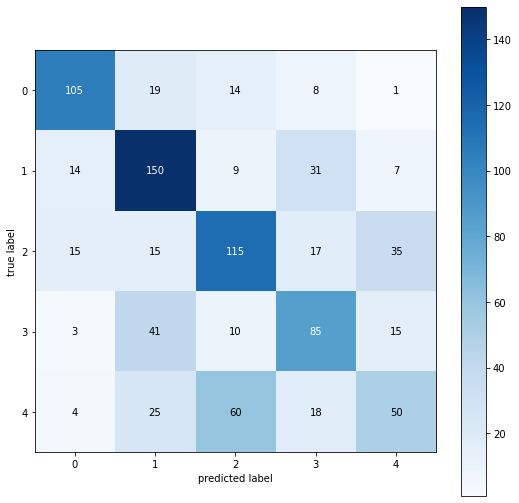

In [30]:
plot_confusion_matrix(confusion_matrix(y_test, y_final), figsize=(9,9), colorbar=True)